### Classification with Support Vector Machines

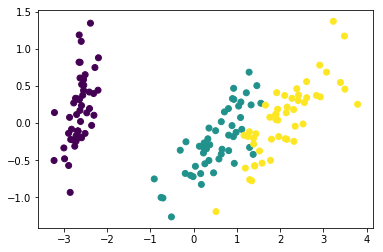

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv

#dataset = pd.read_csv('/Users/xuxp001/Documents/Data Mining Principles/Week-3/Iris.csv')
#iris_pca = dataset.iloc[:, [1, 2, 3, 4, 5]]
# Load the Iris Data
iris = pd.read_csv('Iris.csv')
    
# Now lets get the data and labels
data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
#labels = np.array([i//50 for i in range(iris.shape[0])])

  
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


X=pca.fit_transform(data)
species_iris=iris.iloc[:,[5]]#.values[:,0]
y=species_iris['Species'].astype('category').cat.codes
#Show the data

labels=y.ravel()

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


In [5]:
from sklearn.metrics import classification_report
#import sklearn.cross_validation as cv (if you are using an earlier version)
import sklearn.model_selection as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

# Next lets try Linear SVM
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.82      1.00      0.90         9
   Virginica       1.00      0.88      0.94        17

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [6]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train,y_train)

/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
y_pred=rbf_svc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.80      0.89      0.84         9
   Virginica       0.94      0.88      0.91        17

   micro avg       0.92      0.92      0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


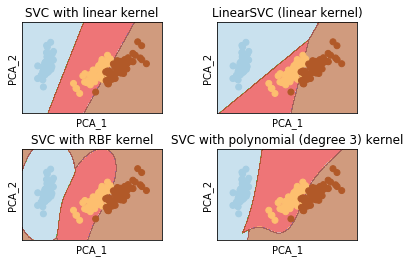

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Understanding Support Vectors

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X=np.array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.24,  3.98],
       [13.05,  1.77],
       [14.21,  4.04],
       [14.38,  3.59],
       [13.9 ,  1.68],
       [14.1 ,  2.02],
       [13.94,  1.73],
       [13.05,  1.73],
       [13.83,  1.65],
       [13.82,  1.75],
       [13.77,  1.9 ],
       [13.74,  1.67],
       [13.56,  1.73],
       [14.22,  1.7 ],
       [13.29,  1.97],
       [13.72,  1.43],
       [12.37,  0.94],
       [12.33,  1.1 ],
       [12.64,  1.36],
       [13.67,  1.25],
       [12.37,  1.13],
       [12.17,  1.45],
       [12.37,  1.21],
       [13.11,  1.01],
       [12.37,  1.17],
       [13.34,  0.94],
       [12.21,  1.19],
       [12.29,  1.61],
       [13.86,  1.51],
       [13.49,  1.66],
       [12.99,  1.67],
       [11.96,  1.09],
       [11.66,  1.88],
       [13.03,  0.9 ],
       [11.84,  2.89],
       [12.33,  0.99],
       [12.7 ,  3.87],
       [12.  ,  0.92],
       [12.72,  1.81],
       [12.08,  1.13],
       [13.05,  3.86],
       [11.84,  0.89],
       [12.67,  0.98],
       [12.16,  1.61],
       [11.65,  1.67],
       [11.64,  2.06],
       [12.08,  1.33],
       [12.08,  1.83],
       [12.  ,  1.51],
       [12.69,  1.53],
       [12.29,  2.83],
       [11.62,  1.99],
       [12.47,  1.52],
       [11.81,  2.12],
       [12.29,  1.41],
       [12.37,  1.07],
       [12.29,  3.17],
       [12.08,  2.08],
       [12.6 ,  1.34],
       [12.34,  2.45],
       [11.82,  1.72],
       [12.51,  1.73],
       [12.42,  2.55],
       [12.25,  1.73],
       [12.72,  1.75],
       [12.22,  1.29],
       [11.61,  1.35],
       [11.46,  3.74],
       [12.52,  2.43],
       [11.76,  2.68],
       [11.41,  0.74],
       [12.08,  1.39],
       [11.03,  1.51],
       [11.82,  1.47],
       [12.42,  1.61],
       [12.77,  3.43],
       [12.  ,  3.43],
       [11.45,  2.4 ],
       [11.56,  2.05],
       [12.42,  4.43],
       [13.05,  5.8 ],
       [11.87,  4.31],
       [12.07,  2.16],
       [12.43,  1.53],
       [11.79,  2.13],
       [12.37,  1.63],
       [12.04,  4.3 ],
       [12.86,  1.35],
       [12.88,  2.99],
       [12.81,  2.31],
       [12.7 ,  3.55],
       [12.51,  1.24],
       [12.6 ,  2.46],
       [12.25,  4.72],
       [12.53,  5.51],
       [13.49,  3.59],
       [12.84,  2.96],
       [12.93,  2.81],
       [13.36,  2.56],
       [13.52,  3.17],
       [13.62,  4.95],
       [12.25,  3.88],
       [13.16,  3.57],
       [13.88,  5.04],
       [12.87,  4.61],
       [13.32,  3.24],
       [13.08,  3.9 ],
       [13.5 ,  3.12],
       [12.79,  2.67],
       [13.11,  1.9 ],
       [13.23,  3.3 ],
       [12.58,  1.29],
       [13.17,  5.19],
       [13.84,  4.12],
       [12.45,  3.03],
       [14.34,  1.68],
       [13.48,  1.67],
       [12.36,  3.83],
       [13.69,  3.26],
       [12.85,  3.27],
       [12.96,  3.45],
       [13.78,  2.76],
       [13.73,  4.36],
       [13.45,  3.7 ],
       [12.82,  3.37],
       [13.58,  2.58],
       [13.4 ,  4.6 ],
       [12.2 ,  3.03],
       [12.77,  2.39],
       [14.16,  2.51],
       [13.71,  5.65],
       [13.4 ,  3.91],
       [13.27,  4.28],
       [13.17,  2.59],
       [14.13,  4.1 ]])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

def plot_data(x,y,title):
    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.axis('tight');
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.title(title);
    

#Define classifier plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);

Number of original examples 178
Number of support vectors 81


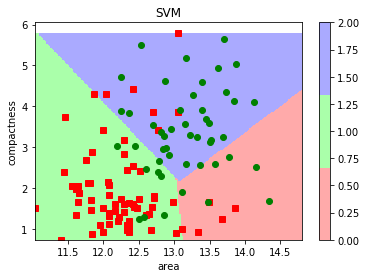

In [11]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, "SVM")

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

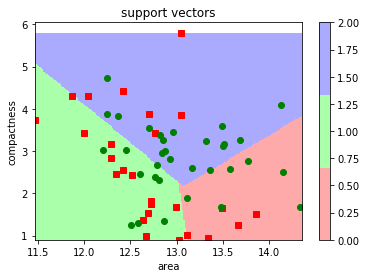

In [12]:
# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, "support vectors")
#support vectors learning from problematic observation.

In [13]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

# Instantiate the GridSearchCV object and run the search
# Runs each parameter one by one and save results. Compare 
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,2]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.1}


/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 1, 'loss': 'hinge', 'penalty': 'l2'}
Best CV accuracy 0.45864661654135336
Test accuracy of best grid search hypers: 0.35555555555555557


https://stackoverflow.com/questions/33843981/under-what-parameters-are-svc-and-linearsvc-in-scikit-learn-equivalent/33844092#33844092

By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss. It is possible to manually define a 'hinge' string for loss parameter in LinearSVC.